In [3]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:

# Load the data
df = pd.read_csv(r"C:\Users\rawat\Downloads\parents_feedback_xyz_school.csv")
df.head()

,Parent's Name,Feedback,Date
0,Priya Sharma,Excellent teaching and facilities.,01-06-2007
1,Rajesh Kumar,"Good academic results, but management issues.",15-09-2010
2,Anjali Patel,Facilities have deteriorated over time.,20-02-2013
3,Ravi Singh,Quality of education declining.,05-07-2015
4,Sunita Mehta,Lack of communication from the school.,12-10-2017


In [7]:
# Preprocess the text data
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rawat\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [22]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

df['cleaned_feedback'] = df['Feedback'].apply(clean_text)


In [11]:
# Sentiment Analysis with VADER
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    sentiment_dict = sia.polarity_scores(text)
    if sentiment_dict['compound'] >= 0.05:
        return 'positive'
    elif sentiment_dict['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['vader_sentiment'] = df['cleaned_feedback'].apply(get_vader_sentiment)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rawat\AppData\Roaming\nltk_data...


C:\Users\rawat\AppData\Local\Temp\ipykernel_5192\1584511773.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='vader_sentiment', palette='viridis')


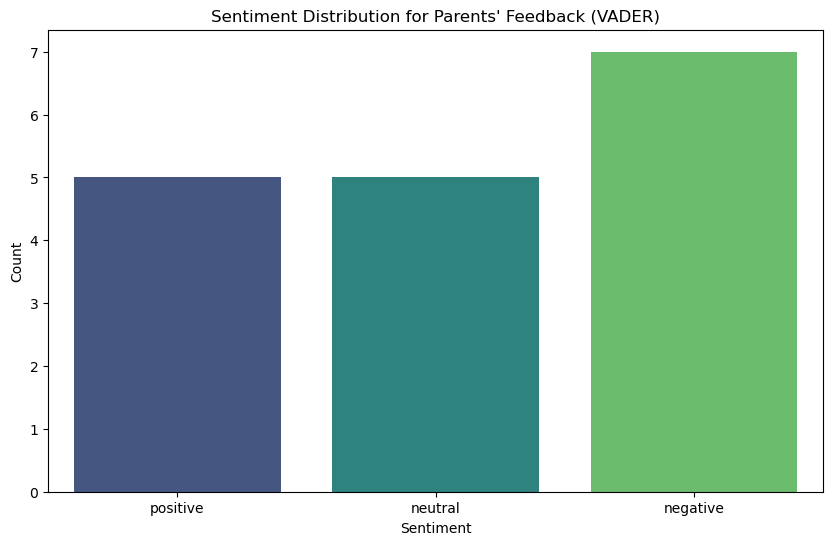

In [16]:
# Visualize the Results
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='vader_sentiment', palette='viridis')
plt.title('Sentiment Distribution for Parents\' Feedback (VADER)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
